# Práctica Grupos 2

## Descripción 

Vamos a analizar visualmente los datos de los diamantes que hemos visto en clase.

## Guion

1) Las librerías que vamos a utilizar son las siguientes:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2) Cargamos el archivo *diamonds_example.csv* con la función *read_csv()*.

In [2]:
datos = pd.read_csv("diamonds_example.csv")
print(datos)

          no  carat        cut color clarity  depth  table  price  x size  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326    3.95   
1          2   0.21    Premium     E     SI1   59.8   61.0    326    3.89   
2          3   0.23       Good     E     VS1   56.9   65.0    327    4.05   
3          4   0.29    Premium     I     VS2   62.4   58.0    334    4.20   
4          5   0.31       Good     J     SI2   63.3   58.0    335    4.34   
...      ...    ...        ...   ...     ...    ...    ...    ...     ...   
53935  53936   0.72      Ideal     D     SI1   60.8   57.0   2757    5.75   
53936  53937   0.72       Good     D     SI1   63.1   55.0   2757    5.69   
53937  53938   0.70  Very Good     D     SI1   62.8   60.0   2757    5.66   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757    6.15   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757    5.83   

       y size  z size  
0        3.98    2.43  
1        3.84    2.31  
2  

3) Define las características en las que estás interesado como caracteristica_x y caracteristica_y. Como variable independiente utilizaremos price.

In [3]:
datos.head()
feature_y = "price"
feature_x = "carat"

4) Nos interesa filtrar los datos para cada tipo de corte. Para ello simplemente utiliza la expresión:

    datos[datos['cut'] == "TIPODECORTE"]
    
Para cada uno de los tipos de corte existentes.

In [4]:
corte_ideal = datos[datos['cut'] == "Ideal"]
print(corte_ideal)
corte_premium = datos[datos['cut'] == "Premium"]
print(corte_premium)
corte_good = datos[datos['cut'] == "Good"]
print(corte_good)
corte_very_good = datos[datos['cut'] == "Very Good"]
print(corte_very_good)

          no  carat    cut color clarity  depth  table  price  x size  y size  \
0          1   0.23  Ideal     E     SI2   61.5   55.0    326    3.95    3.98   
11        12   0.23  Ideal     J     VS1   62.8   56.0    340    3.93    3.90   
13        14   0.31  Ideal     J     SI2   62.2   54.0    344    4.35    4.37   
16        17   0.30  Ideal     I     SI2   62.0   54.0    348    4.31    4.34   
39        40   0.33  Ideal     I     SI2   61.8   55.0    403    4.49    4.51   
...      ...    ...    ...   ...     ...    ...    ...    ...     ...     ...   
53925  53926   0.79  Ideal     I     SI1   61.6   56.0   2756    5.95    5.97   
53926  53927   0.71  Ideal     E     SI1   61.9   56.0   2756    5.71    5.73   
53929  53930   0.71  Ideal     G     VS1   61.4   56.0   2756    5.76    5.73   
53935  53936   0.72  Ideal     D     SI1   60.8   57.0   2757    5.75    5.76   
53939  53940   0.75  Ideal     D     SI2   62.2   55.0   2757    5.83    5.87   

       z size  
0        2.

5) A continuación:

- Inicializa la variable *figura* con la función *figure()*.

- Pon un título a la *figura* con la función *title()*.

- Queremos mostrar las variables caracteristica_x y caracteristica_y para cada tipo de corte. Todo ello en la misma gráfica, que será de tipo *scatter*.
    - Ej.
    
    
    plt.scatter(fair_diamonds[feature_x], fair_diamonds[feature_y], label="Fair", s=1.8)



- Inserta la siguiente leyenda y etiquetas: 



    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
    plt.xlabel(feature_x) 
    plt.ylabel(feature_y) 
    
    
    
- Por último, muestra la gráfica con la función *show()*.


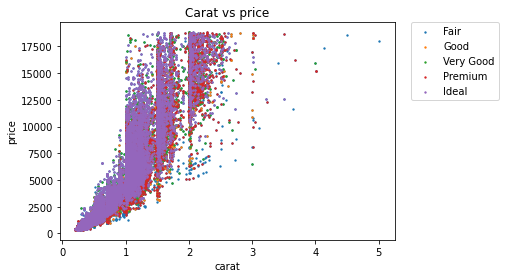

In [8]:
figura = plt.figure()
# figura.title('Figura')
plt.title("Carat vs price")
plt.scatter(datos[feature_x], datos[feature_y], label="Fair", s=1.8)
plt.scatter(corte_good[feature_x], corte_good[feature_y], label="Good", s=1.8)
plt.scatter(corte_very_good[feature_x], corte_very_good[feature_y], label="Very Good", s=1.8)
plt.scatter(corte_premium[feature_x], corte_premium[feature_y], label="Premium", s=1.8)
plt.scatter(corte_ideal[feature_x], corte_ideal[feature_y], label="Ideal", s=1.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.xlabel(feature_x) 
plt.ylabel(feature_y) 
plt.show()

6) Otro tipo de gráfica muy útil para ver correlaciones entre las variables es el mapa de calor o heatmap. En este caso utilizaremos la librería seaborn.

In [6]:
import seaborn as sns

7) Ahora queremos ver cómo se interrelacionan todas las variables entre sí. Pero hay un problema, tenemos variables categóricas. Para mostrarlas en la gráfica simplemente las convertirmos en números (todavía no es necesario utiliar las conversiones vistas en clase para su incorporación en los algoritmos).

Para codificar las categorías utiliza la siguiente expresión:

    encoding_categories = {
                        'cut': {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5},
                       'color': {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1},
                       'clarity': {'FL': 11, 'IF': 10, 'VVS1': 9, 'VVS2': 8, 'VS1': 7, 'VS2': 6, 'SI1': 5, 'SI2': 4,                                        'I1': 3, 'I2': 2, 'I3': 1}
                       }


Reemplazalos en los datos cargados.

In [9]:
encoding_categories = {
                    'cut': {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5},
                   'color': {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1},
                   'clarity': {'FL': 11, 'IF': 10, 'VVS1': 9, 'VVS2': 8, 'VS1': 7, 'VS2': 6, 'SI1': 5, 'SI2': 4,                                        'I1': 3, 'I2': 2, 'I3': 1}
                   }
datos = datos.replace(encoding_categories)

8) Por último, mostramos el heatmap. Ejecuta el siguiente código:

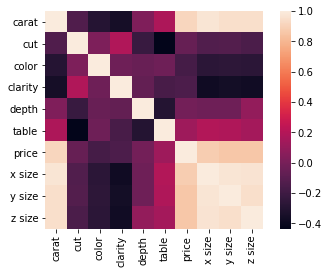

In [10]:
data_subset = datos[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x size', 'y size', 'z size']]
cor = data_subset.corr()
sns.heatmap(cor, square=True)
plt.show()

9) ¿Qué observas en la gráfica del apartado 5)?

Precio mayor conforme se aumenta el peso (quilates). Cuanto menor peso el corte (cut) es mejor.
La mayoria es un corte ideal y la mayoría de diamates están entre 1 y 2. A partir de 3 quilates la calidad de corte es menor.

10) ¿Qué observas en la gráfica del apartado 8)?

*Tu solución*